In [209]:
import warnings
import numpy as np
import pandas as pd
warnings.filterwarnings('ignore')

In [210]:
data = pd.read_csv('/kaggle/input/results/combined_results.csv')
data.sample(5)

,file_name,algorithm,trial_number,architecture,learning_rate,batch_size,dropout_rate,optimizer,epochs,freeze_base,optimized_parameter,optimization_type,num_optimized_factors,optimized_factors,train_accuracy,train_precision,train_recall,train_f1_score,train_auc,train_cm_tn,train_cm_fp,train_cm_fn,train_cm_tp,val_accuracy,val_precision,val_recall,val_f1_score,val_auc,val_cm_tn,val_cm_fp,val_cm_fn,val_cm_tp,test_accuracy,test_precision,test_recall,test_f1_score,test_auc,test_cm_tn,test_cm_fp,test_cm_fn,test_cm_tp,min_train_loss,min_val_loss,max_train_f1,max_val_f1,max_train_accuracy,max_val_accuracy,training_time,final_epoch,input_shape,num_classes,history_loss_final,history_loss_best,history_loss_mean,history_loss_std,history_val_loss_final,history_val_loss_best,history_val_loss_mean,history_val_loss_std,history_f1_score_metric_final,history_f1_score_metric_best,history_f1_score_metric_mean,history_f1_score_metric_std,history_val_f1_score_metric_final,history_val_f1_score_metric_best,history_val_f1_score_metric_mean,history_val_f1_score_metric_std,history_accuracy_final,history_accuracy_best,history_accuracy_mean,history_accuracy_std,history_val_accuracy_final,history_val_accuracy_best,history_val_accuracy_mean,history_val_accuracy_std
1865,experiment_trial_018_inceptionv3_all_adam_bs12...,Random_Search,18,inceptionv3,0.0010,128,0.5,adam,20,True,LEARNING_RATE-BATCH_SIZE-DROPOUT_RATE,multi_factor,3,"LEARNING_RATE, BATCH_SIZE, DROPOUT_RATE",0.921429,0.930867,0.910476,0.920558,0.976633,1958,142,188,1912,0.907778,0.919908,0.893333,0.906426,0.964933,415,35,48,402,0.916667,0.923251,0.908889,0.916013,0.966548,416,34,41,409,0.231677,0.233982,0.496247,0.516346,0.907857,0.907778,1008.125945,20,"[224, 224, 3]",2,0.231677,0.231677,0.294079,0.088487,0.233982,0.233982,0.260849,0.031110,0.494581,0.496247,0.492202,0.004193,0.493063,0.516346,0.493189,0.007419,0.907857,0.907857,0.875119,0.048966,0.907778,0.907778,0.893722,0.014983
155,experiment_trial_002_mobilenetv2_all_adam_bs64...,Grid_Search,2,mobilenetv2,0.0010,64,0.2,adam,20,True,BATCH_SIZE-OPTIMIZER,multi_factor,2,"BATCH_SIZE, OPTIMIZER",0.930714,0.953383,0.905714,0.928938,0.981175,2007,93,198,1902,0.914444,0.940898,0.884444,0.911798,0.965881,425,25,52,398,0.910000,0.924138,0.893333,0.908475,0.967881,417,33,48,402,0.194429,0.233012,0.495589,0.508124,0.924524,0.916667,966.336735,20,"[224, 224, 3]",2,0.194429,0.194429,0.227815,0.047210,0.238046,0.233012,0.243924,0.012609,0.493345,0.495589,0.493995,0.001082,0.484820,0.508124,0.494247,0.006221,0.924524,0.924524,0.908893,0.025151,0.914444,0.916667,0.906056,0.009112
506,experiment_trial_011_vgg16_all_adam_bs128_lr1e...,Bayesian_Optimization,11,vgg16,0.0100,128,0.4,adam,50,True,LEARNING_RATE-BATCH_SIZE-DROPOUT_RATE-EPOCHS-O...,multi_factor,5,"LEARNING_RATE, BATCH_SIZE, DROPOUT_RATE, EPOCH...",0.893571,0.909361,0.874286,0.891479,0.958645,1917,183,264,1836,0.882222,0.896313,0.864444,0.880090,0.943793,405,45,61,389,0.886667,0.886667,0.886667,0.886667,0.945220,399,51,51,399,0.313684,0.299786,0.505482,0.516599,0.875000,0.883333,2826.105366,50,"[224, 224, 3]",2,0.314775,0.313684,0.341409,0.040398,0.304084,0.299786,0.321385,0.029265,0.501806,0.505482,0.499408,0.003076,0.491766,0.516599,0.500381,0.006299,0.874048,0.875000,0.859514,0.022481,0.882222,0.883333,0.872267,0.011957
364,experiment_trial_003_inceptionv3_all_adam_bs12...,Grid_Search,3,inceptionv3,0.0001,128,0.2,adam,20,True,LEARNING_RATE-BATCH_SIZE,multi_factor,2,"LEARNING_RATE, BATCH_SIZE",0.884286,0.904309,0.859524,0.881348,0.955053,1909,191,295,1805,0.882222,0.894495,0.866667,0.880361,0.947842,404,46,60,390,0.898889,0.908884,0.886667,0.897638,0.949190,410,40,51,399,0.298445,0.292940,0.499039,0.518467,0.882143,0.883333,1017.667492,20,"[224, 224, 3]",2,0.298445,0.298445,0.398268,0.118987,0.292940,0.292940,0.368933,0.091459,0.489789,0.499039,0.490634,0.003179,0.492852,0.518467,0.494804,0.009437,0.879286,0.882143,0.818179,0.093248,0.882222,0.883333,0.848167,0.058413
485,experiment_trial_000_mobilen

In [211]:
data.drop(columns=[col for col in data.columns if col in['file_name', 'freeze_base', 'input_shape', 'num_classes', 'optimized_factors'] ], inplace=True)
data.sample()

,algorithm,trial_number,architecture,learning_rate,batch_size,dropout_rate,optimizer,epochs,optimized_parameter,optimization_type,num_optimized_factors,train_accuracy,train_precision,train_recall,train_f1_score,train_auc,train_cm_tn,train_cm_fp,train_cm_fn,train_cm_tp,val_accuracy,val_precision,val_recall,val_f1_score,val_auc,val_cm_tn,val_cm_fp,val_cm_fn,val_cm_tp,test_accuracy,test_precision,test_recall,test_f1_score,test_auc,test_cm_tn,test_cm_fp,test_cm_fn,test_cm_tp,min_train_loss,min_val_loss,max_train_f1,max_val_f1,max_train_accuracy,max_val_accuracy,training_time,final_epoch,history_loss_final,history_loss_best,history_loss_mean,history_loss_std,history_val_loss_final,history_val_loss_best,history_val_loss_mean,history_val_loss_std,history_f1_score_metric_final,history_f1_score_metric_best,history_f1_score_metric_mean,history_f1_score_metric_std,history_val_f1_score_metric_final,history_val_f1_score_metric_best,history_val_f1_score_metric_mean,history_val_f1_score_metric_std,history_accuracy_final,history_accuracy_best,history_accuracy_mean,history_accuracy_std,history_val_accuracy_final,history_val_accuracy_best,history_val_accuracy_mean,history_val_accuracy_std
1353,Random_Search,2,resnet50,0.001,64,0.2,adam,30,LEARNING_RATE-BATCH_SIZE-EPOCHS-OPTIMIZER,multi_factor,4,0.751667,0.74894,0.757143,0.753019,0.826932,1567,533,510,1590,0.765556,0.767338,0.762222,0.764771,0.837477,346,104,107,343,0.736667,0.725159,0.762222,0.743229,0.799748,320,130,107,343,0.586335,0.565243,0.519934,0.64948,0.727619,0.767778,1515.492038,30,0.586335,0.586335,0.625391,0.032561,0.565243,0.565243,0.60951,0.033461,0.512941,0.519934,0.499128,0.018568,0.497396,0.64948,0.509806,0.078381,0.725238,0.727619,0.676103,0.055868,0.765556,0.767778,0.725667,0.052657


In [212]:
data.drop_duplicates(
    subset=['algorithm','trial_number', 'architecture', 'optimized_parameter'],
    keep='first',
    inplace=True
)

In [213]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)

## Single Factor Analysis

In [214]:
df = data[data['optimization_type']=='single_factor'].copy()
df.drop(columns=[col for col in df.columns if col in['algorithm', 'optimization_type']], inplace=True)
df.shape

(88, 68)

In [215]:
df.shape

(88, 68)

In [216]:
df.training_time.sum()/3600

28.134057823611112

In [217]:
df.to_csv('single_factor_result.csv', index=True)

Saved to: test_F1_Distribution_by_Optimized_Hyperparameter_hue_architecture.png


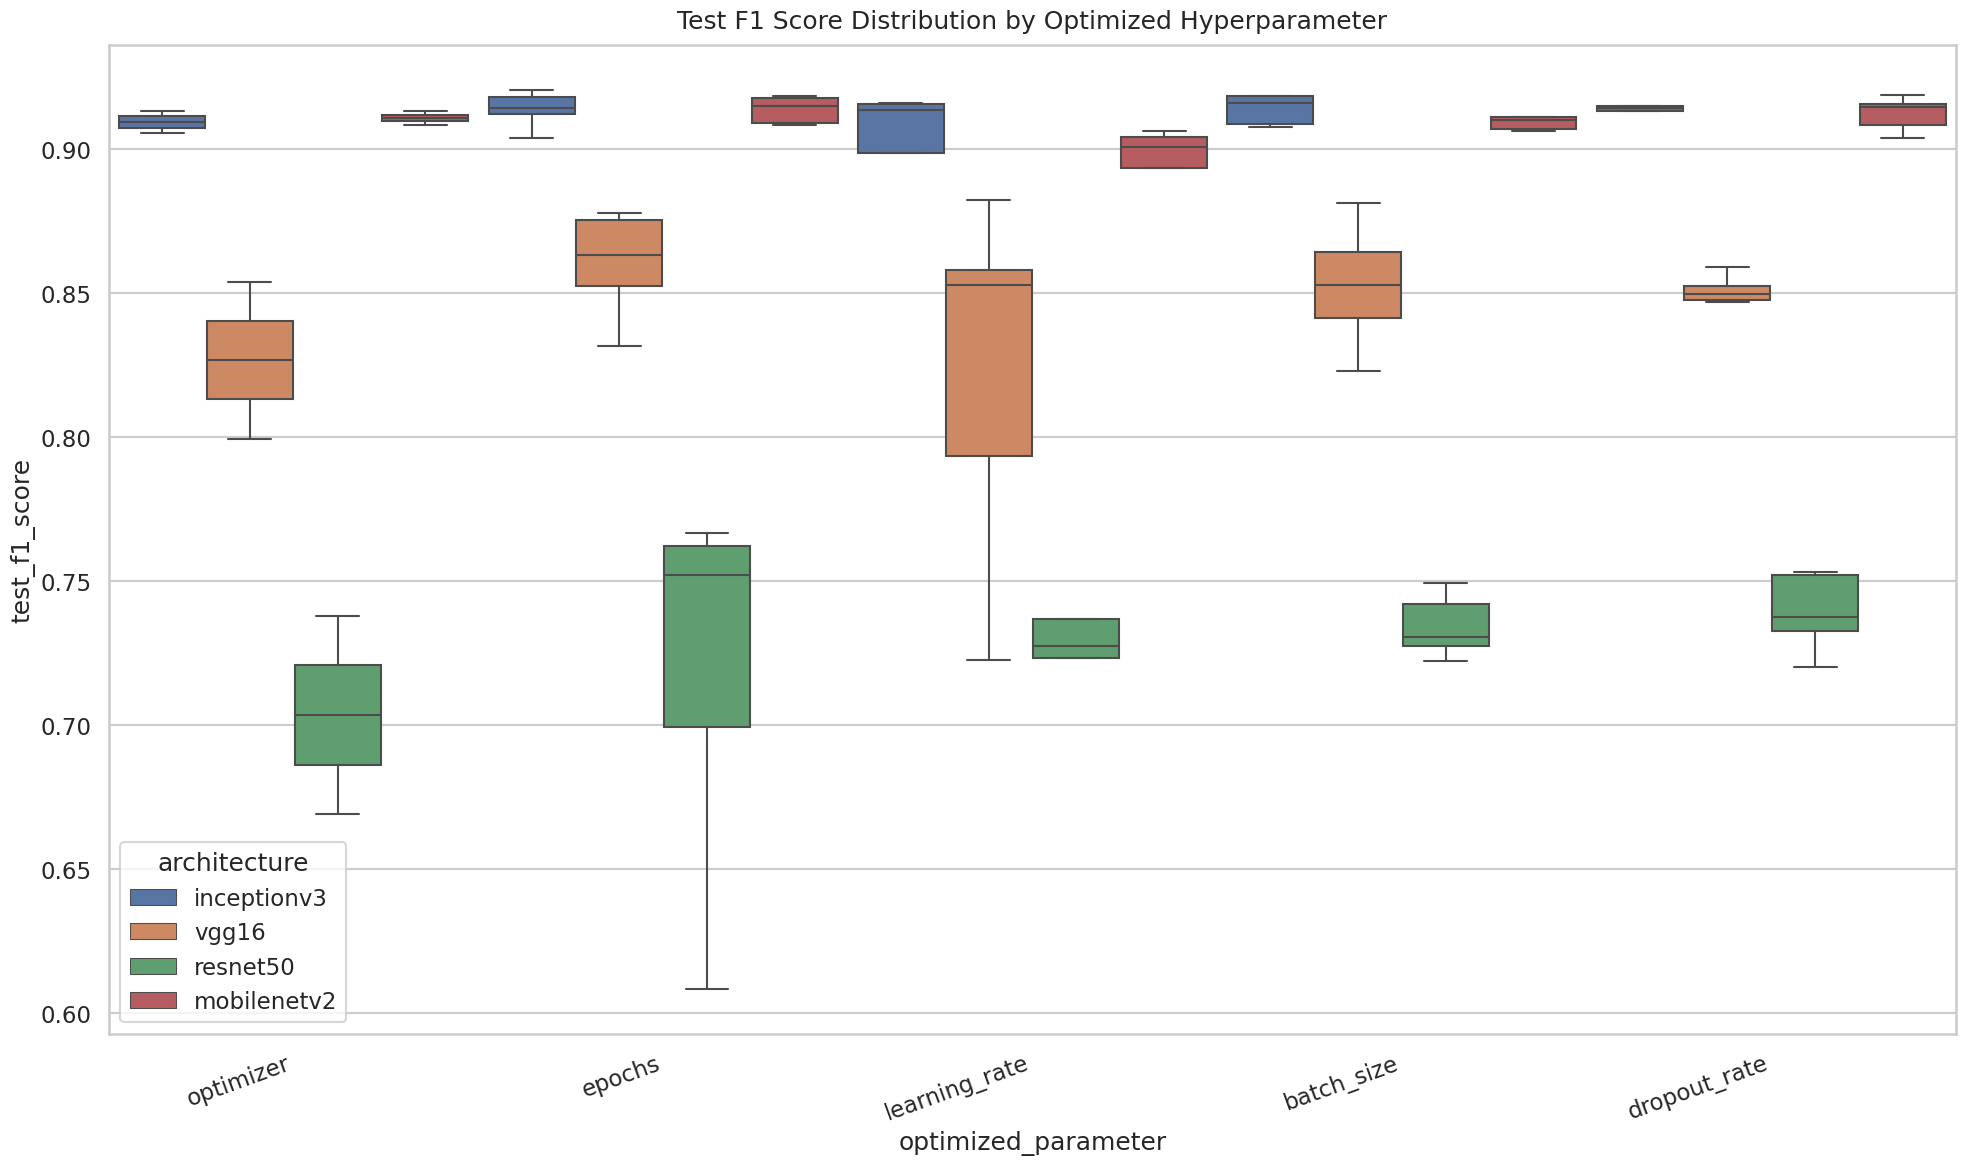

In [218]:
# Test F1 Score Distribution by Optimized Hyperparameter (with hue='architecture')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# --- Load & prepare ---
path = "/kaggle/working//single_factor_result.csv"   
df = pd.read_csv(path)

# Only one-factor-at-a-time experiments
ofat = df[df["num_optimized_factors"] == 1].copy()

# Order of x-axis to match the attached figure
x_order = ["optimizer", "epochs", "learning_rate", "batch_size", "dropout_rate"]

# Consistent legend order & palette (clean, readable colors)
arch_order = ["inceptionv3", "vgg16", "resnet50", "mobilenetv2"]
palette = sns.color_palette("deep", n_colors=len(arch_order))
palette = dict(zip(arch_order, palette))

# --- Plot ---
sns.set_theme(style="whitegrid", context="talk")
fig, ax = plt.subplots(figsize=(20, 12))

sns.boxplot(
    data=ofat,
    x="optimized_parameter",
    y="test_f1_score",
    hue="architecture",
    order=x_order,
    hue_order=arch_order,
    palette=palette,
    showfliers=False,
    width=0.95,        # chunkier boxes
    linewidth=1.5,    # thicker outlines
    ax=ax
)

# Titles & labels
ax.set_title("Test F1 Score Distribution by Optimized Hyperparameter", pad=12)
ax.set_xlabel("optimized_parameter")
ax.set_ylabel("test_f1_score")

# Ticks
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")

# Legend (compact)
leg = ax.legend(title="architecture", loc="lower left", frameon=True)
for lh in leg.legend_handles:
    lh.set_alpha(1)

plt.tight_layout()

# Save
out_path = Path("test_F1_Distribution_by_Optimized_Hyperparameter_hue_architecture.png")
plt.savefig(out_path, dpi=300, bbox_inches="tight")
print(f"Saved to: {out_path}")
plt.show()


## 2 Factor Analysis

In [219]:
df1 = data[data['num_optimized_factors']==2].copy()
df1.shape

(478, 70)

In [220]:
df1.training_time.sum()/3600

167.2989096113889

In [221]:
df1.to_csv('2factor_result.csv', index=False)

In [222]:
df = pd.read_csv('/kaggle/working/2factor_result.csv')
df.head()

,algorithm,trial_number,architecture,learning_rate,batch_size,dropout_rate,optimizer,epochs,optimized_parameter,optimization_type,num_optimized_factors,train_accuracy,train_precision,train_recall,train_f1_score,train_auc,train_cm_tn,train_cm_fp,train_cm_fn,train_cm_tp,val_accuracy,val_precision,val_recall,val_f1_score,val_auc,val_cm_tn,val_cm_fp,val_cm_fn,val_cm_tp,test_accuracy,test_precision,test_recall,test_f1_score,test_auc,test_cm_tn,test_cm_fp,test_cm_fn,test_cm_tp,min_train_loss,min_val_loss,max_train_f1,max_val_f1,max_train_accuracy,max_val_accuracy,training_time,final_epoch,history_loss_final,history_loss_best,history_loss_mean,history_loss_std,history_val_loss_final,history_val_loss_best,history_val_loss_mean,history_val_loss_std,history_f1_score_metric_final,history_f1_score_metric_best,history_f1_score_metric_mean,history_f1_score_metric_std,history_val_f1_score_metric_final,history_val_f1_score_metric_best,history_val_f1_score_metric_mean,history_val_f1_score_metric_std,history_accuracy_final,history_accuracy_best,history_accuracy_mean,history_accuracy_std,history_val_accuracy_final,history_val_accuracy_best,history_val_accuracy_mean,history_val_accuracy_std
0,Grid_Search,0,mobilenetv2,0.001,64,0.2,adam,10,EPOCHS-DROPOUT_RATE,multi_factor,2,0.922143,0.932650,0.910000,0.921186,0.976007,1962,138,189,1911,0.914444,0.932715,0.893333,0.912599,0.964509,421,29,48,402,0.910000,0.905495,0.915556,0.910497,0.967783,407,43,38,412,0.213164,0.238372,0.495689,0.506052,0.917143,0.915556,477.174676,10,0.213164,0.213164,0.254209,0.052251,0.238372,0.238372,0.255257,0.019059,0.494192,0.495689,0.493581,0.001319,0.489274,0.506052,0.492656,0.006144,0.917143,0.917143,0.896095,0.028670,0.914444,0.915556,0.903000,0.012718
1,Grid_Search,0,vgg16,0.001,64,0.2,adam,10,EPOCHS-DROPOUT_RATE,multi_factor,2,0.840476,0.842761,0.837143,0.839943,0.915599,1772,328,342,1758,0.843333,0.845638,0.840000,0.842809,0.907521,381,69,72,378,0.832222,0.824295,0.844444,0.834248,0.902000,369,81,70,380,0.413889,0.405621,0.495096,0.509135,0.834286,0.843333,576.670191,10,0.413889,0.413889,0.493319,0.075806,0.405621,0.405621,0.471108,0.060401,0.491915,0.495096,0.487518,0.011434,0.497792,0.509135,0.492415,0.009121,0.834286,0.834286,0.792143,0.063003,0.843333,0.843333,0.827889,0.009819
2,Grid_Search,1,mobilenetv2,0.001,64,0.1,adam,30,EPOCHS-DROPOUT_RATE,multi_factor,2,0.940476,0.947725,0.932381,0.939990,0.985109,1992,108,142,1958,0.915556,0.928899,0.900000,0.914221,0.966459,419,31,45,405,0.917778,0.919643,0.915556,0.917595,0.969319,414,36,38,412,0.168922,0.232005,0.496683,0.504082,0.936667,0.918889,1378.782044,30,0.168922,0.168922,0.204106,0.044513,0.232776,0.232005,0.242574,0.013576,0.493774,0.496683,0.494452,0.002220,0.492002,0.504082,0.491643,0.006134,0.934762,0.936667,0.919683,0.022668,0.915556,0.918889,0.909815,0.009420
3,Grid_Search,1,vgg16,0.001,64,0.1,adam,30,EPOCHS-DROPOUT_RATE,multi_factor,2,0.875238,0.879576,0.869524,0.874521,0.943406,1850,250,274,1826,0.866667,0.871622,0.860000,0.865772,0.930795,393,57,63,387,0.868889,0.856223,0.886667,0.871179,0.927906,383,67,51,399,0.329983,0.336361,0.500877,0.512841,0.870000,0.866667,1736.256966,30,0.329983,0.329983,0.399191,0.074415,0.336361,0.336361,0.394511,0.062306,0.495144,0.500877,0.495072,0.004440,0.496420,0.512841,0.493713,0.009386,0.870000,0.870000,0.840230,0.034835,0.866667,0.866667,0.845259,0.017479
4,Grid_Search,2,mobilenetv2,0.001,64,0.4,adam,50,EPOCHS-DROPOUT_RATE,multi_factor,2,0.934762,0.959256,0.908095,0.932975,0.982698,2019,81,193,1907,0.908889,0.936019,0.877778,0.905963,0.966049,423,27,55,395,0.910000,0.922197,0.895556,0.908681,0.967699,416,34,47,403,0.197344,0.232762,0.497487,0.504502,0.923571,0.916667,2320.361239,50,0.197344,0.197344,0.222940,0.038318,0.240600,0.232762,0.241053,0.009583,0.496098,0.497487,0.494430,0.001388,0.484279,0.504502,0.491676,0.005732,0.921429,0.923571,0.911224,0.020506,0.908889,0.916667,0.909622,0.006587


In [223]:
archs = ['inceptionv3', 'resnet50']  # best and worst model from the single factor analysis

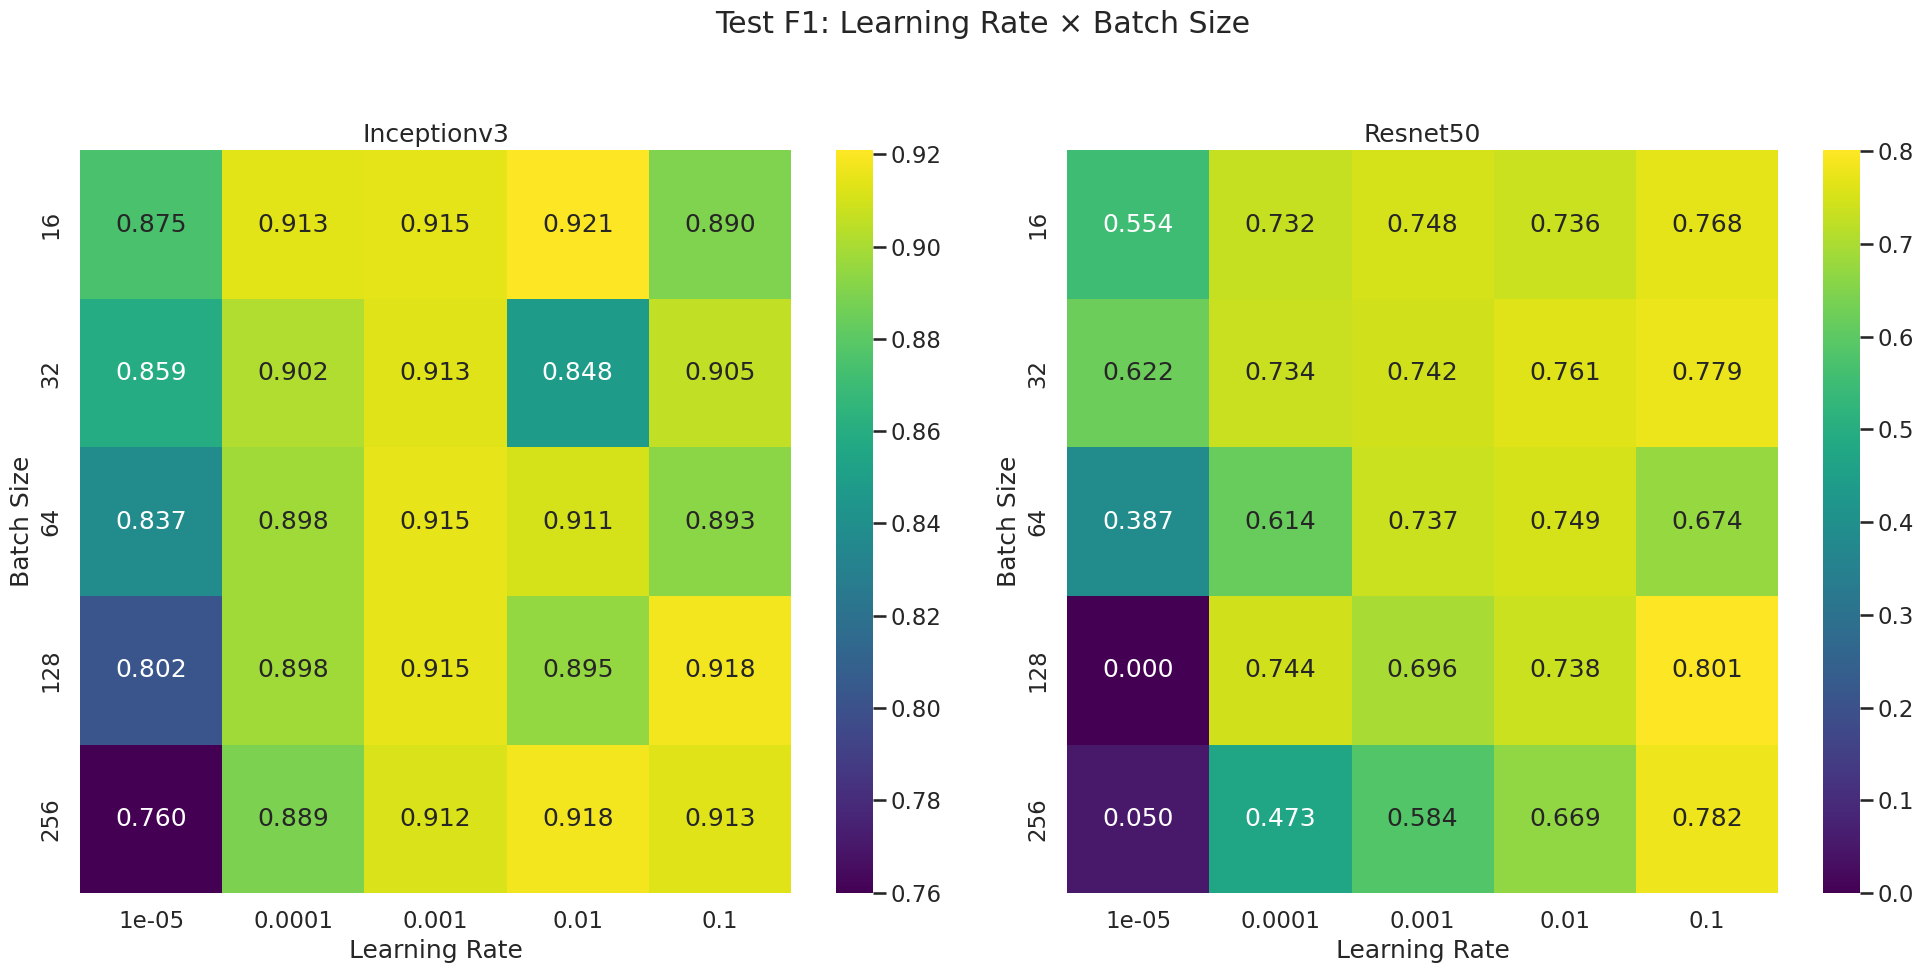

In [224]:
# 1. Learning Rate × Batch Size (Heatmap)
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
for i, arch in enumerate(archs):
    pivot = df[df['architecture']==arch].pivot_table(
        values='test_f1_score', index='batch_size', columns='learning_rate', aggfunc='mean')
    sns.heatmap(pivot, annot=True, fmt=".3f", cmap="viridis", ax=axes[i])
    axes[i].set_title(f'{arch.title()}')
    axes[i].set_xlabel('Learning Rate')
    axes[i].set_ylabel('Batch Size')
fig.suptitle('Test F1: Learning Rate × Batch Size')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('lr_bs.png', dpi=300, bbox_inches='tight')
plt.show()

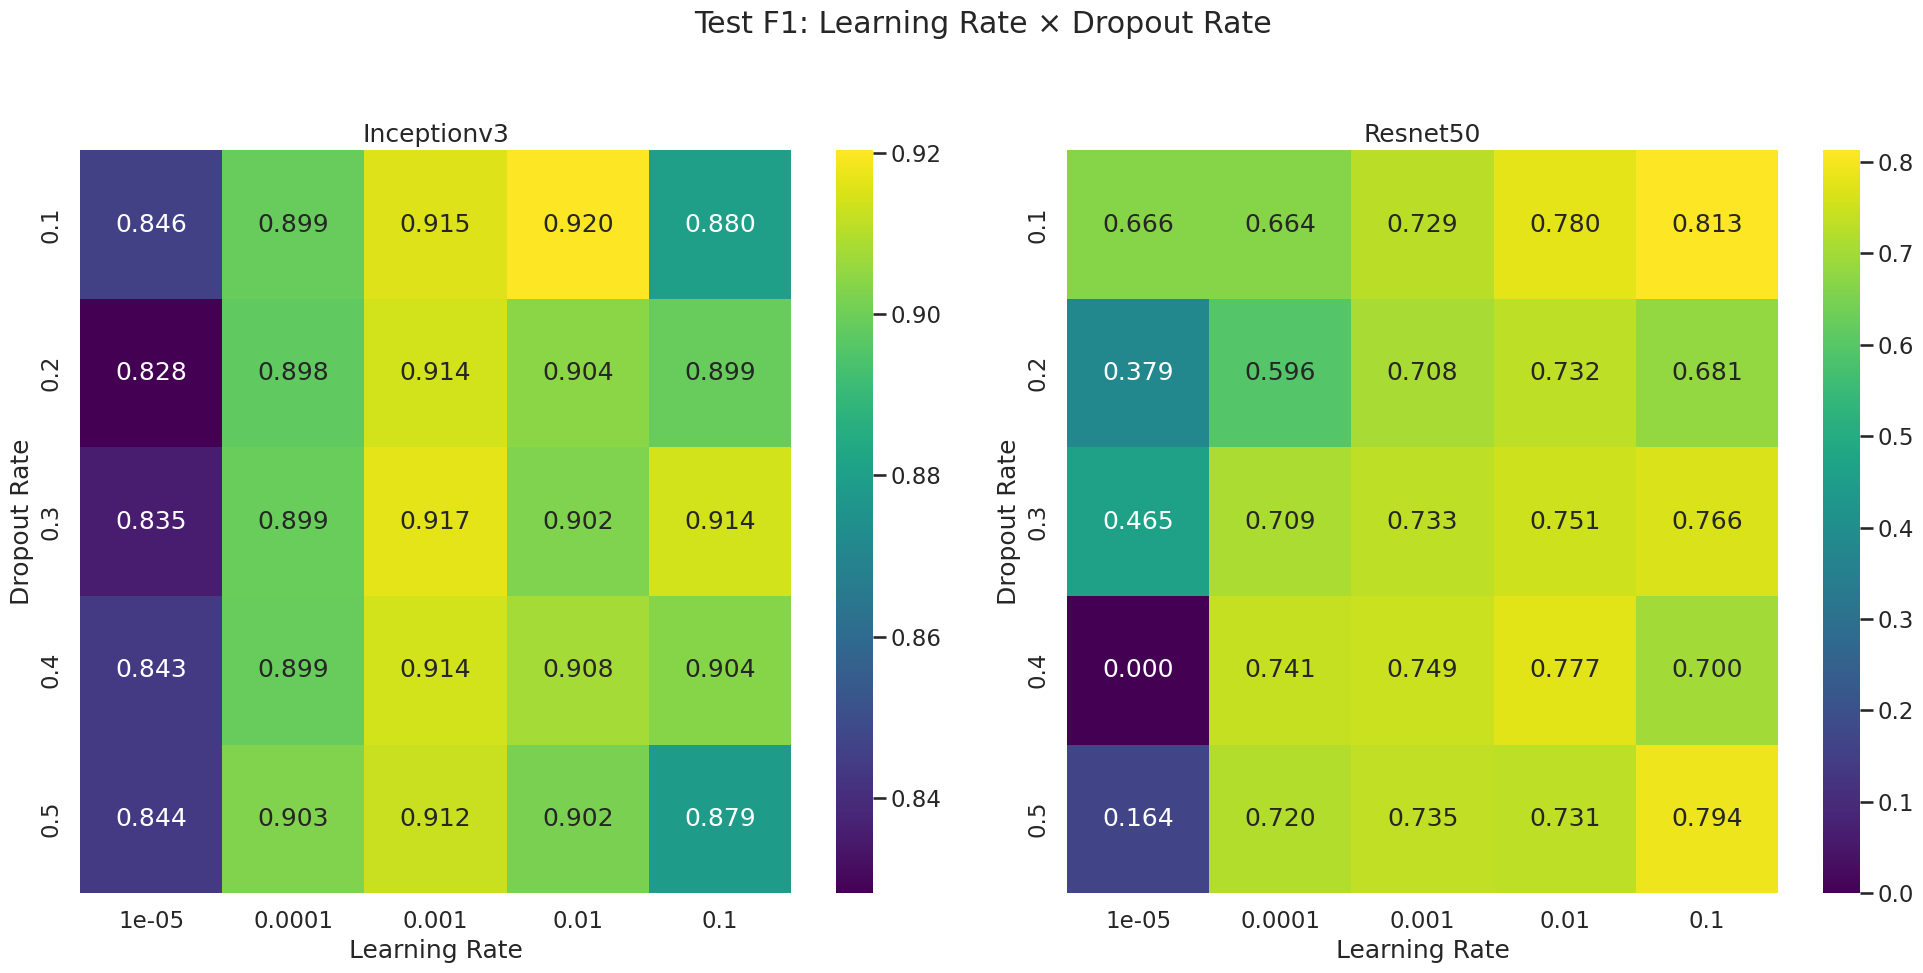

In [225]:
# 2. Learning Rate × Dropout Rate (Heatmap)
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
for i, arch in enumerate(archs):
    pivot = df[df['architecture']==arch].pivot_table(
        values='test_f1_score', index='dropout_rate', columns='learning_rate', aggfunc='mean')
    sns.heatmap(pivot, annot=True, fmt=".3f", cmap="viridis", ax=axes[i])
    axes[i].set_title(f'{arch.title()}')
    axes[i].set_xlabel('Learning Rate')
    axes[i].set_ylabel('Dropout Rate')
fig.suptitle('Test F1: Learning Rate × Dropout Rate')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

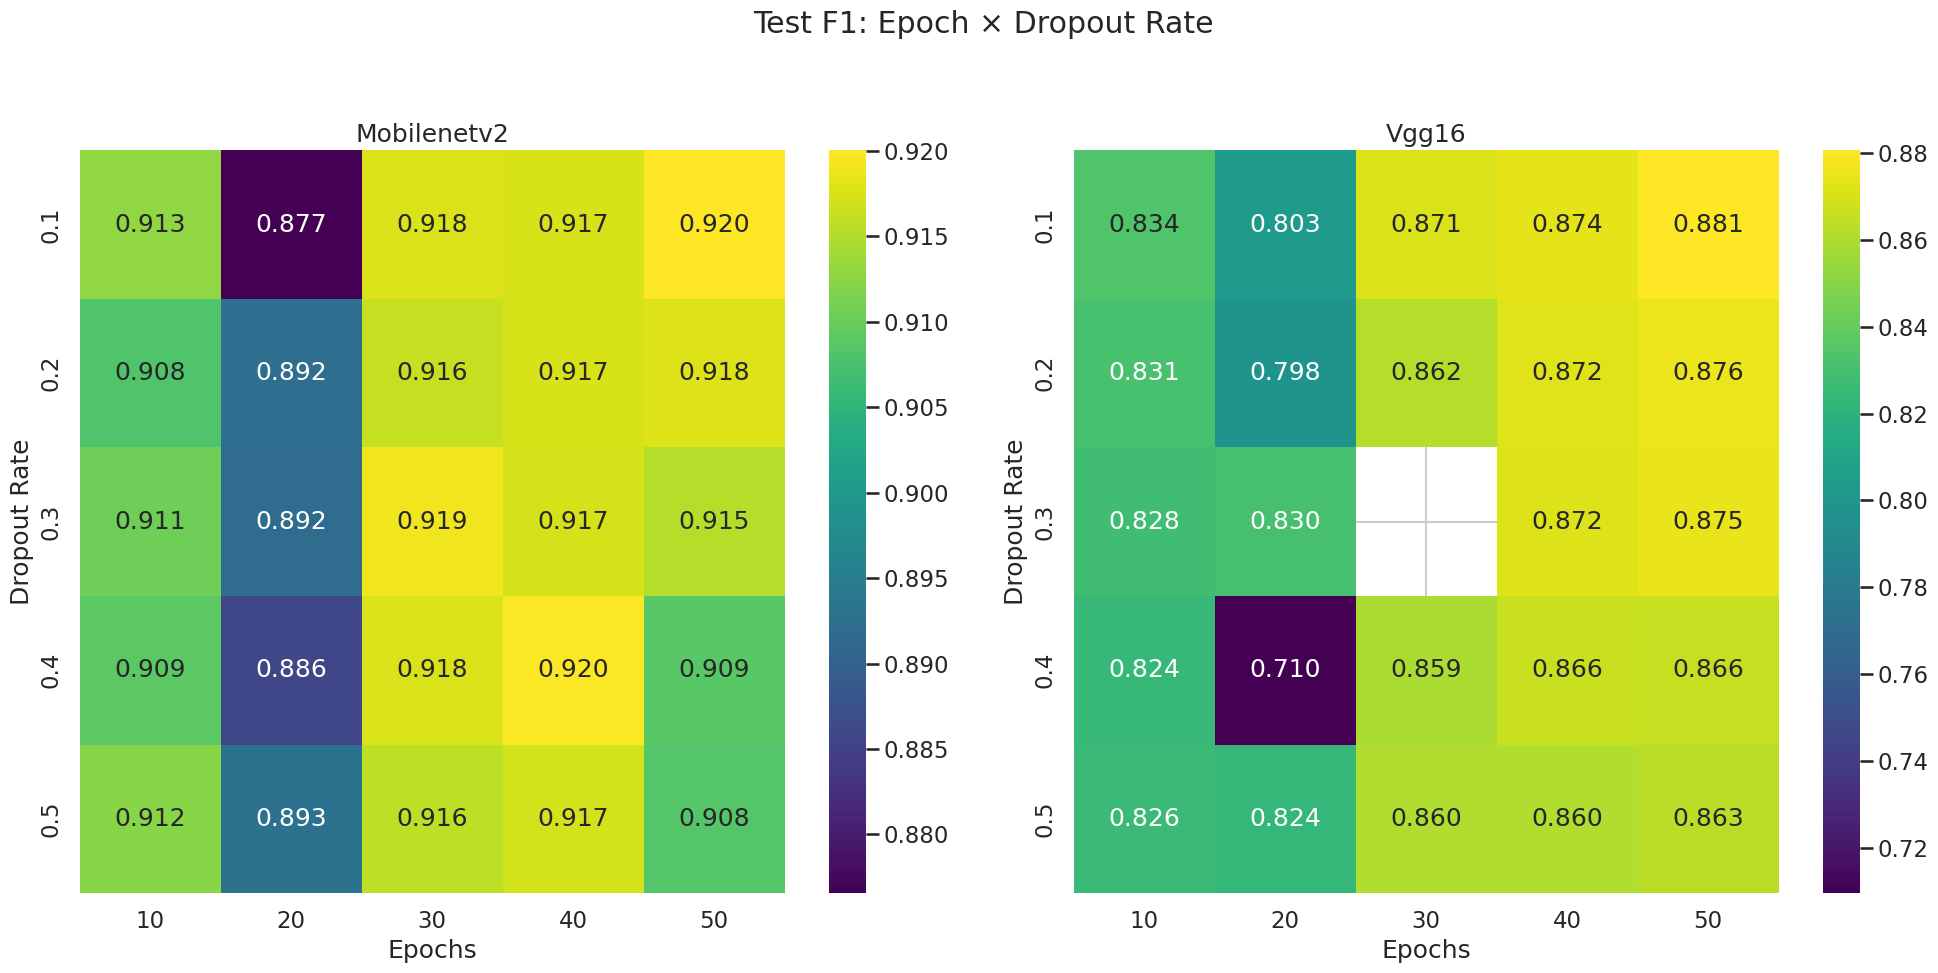

In [226]:
# 3. Epoch × Dropout Rate (Heatmap)
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
for i, arch in enumerate(['mobilenetv2', 'vgg16']):
    pivot = df[df['architecture']==arch].pivot_table(
        values='test_f1_score', index='dropout_rate', columns='epochs', aggfunc='mean')
    sns.heatmap(pivot, annot=True, fmt=".3f", cmap="viridis", ax=axes[i])
    axes[i].set_title(f'{arch.title()}')
    axes[i].set_xlabel('Epochs')
    axes[i].set_ylabel('Dropout Rate')
fig.suptitle('Test F1: Epoch × Dropout Rate')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

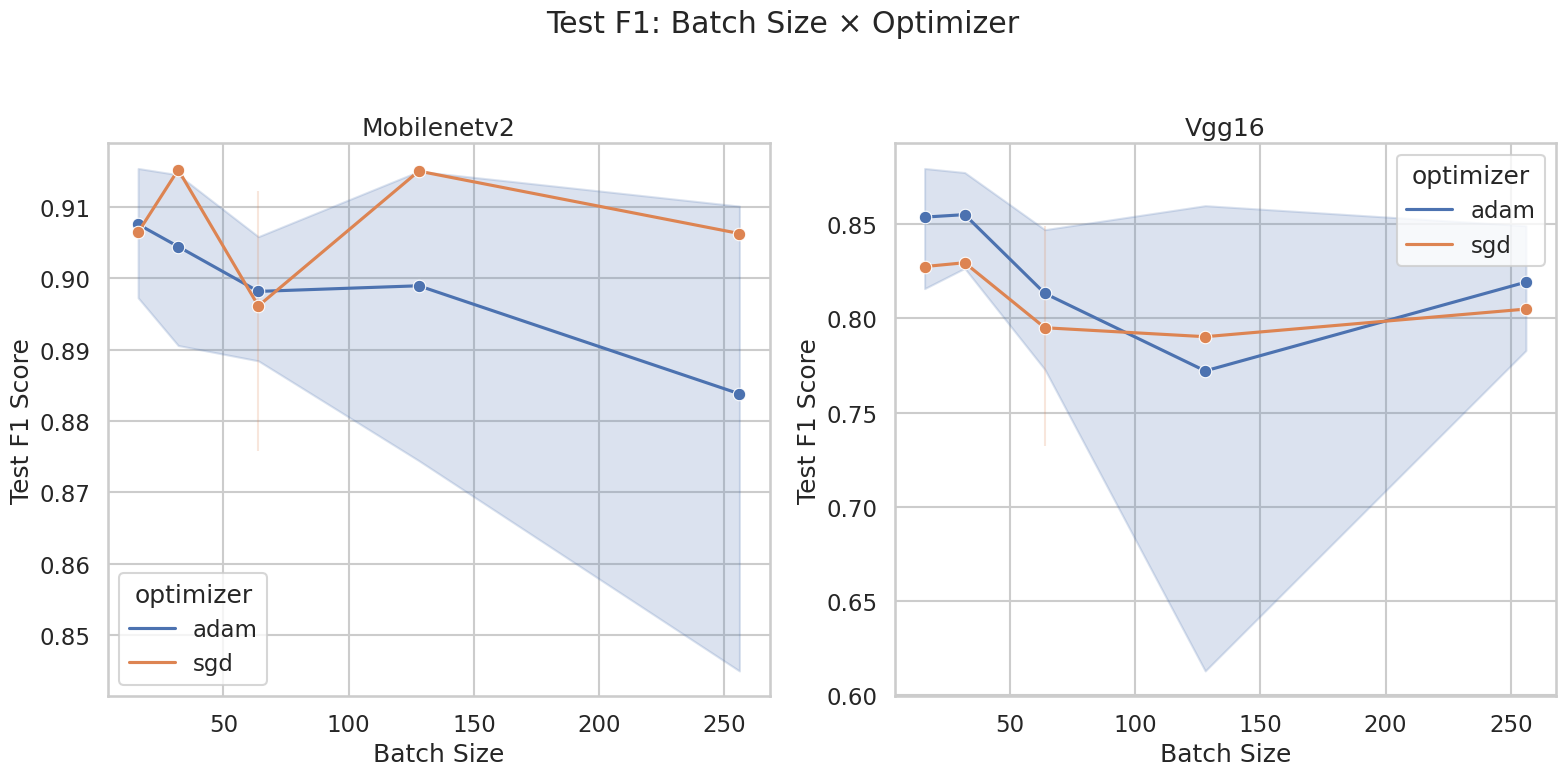

In [227]:
# 4. Batch Size × Optimizer (Lineplot)
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
for i, arch in enumerate(['mobilenetv2', 'vgg16']):
    sns.lineplot(
        data=df[df['architecture'] == arch], 
        x='batch_size', y='test_f1_score', hue='optimizer', marker='o', ax=axes[i])
    axes[i].set_title(f'{arch.title()}')
    axes[i].set_xlabel('Batch Size')
    axes[i].set_ylabel('Test F1 Score')
fig.suptitle('Test F1: Batch Size × Optimizer')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

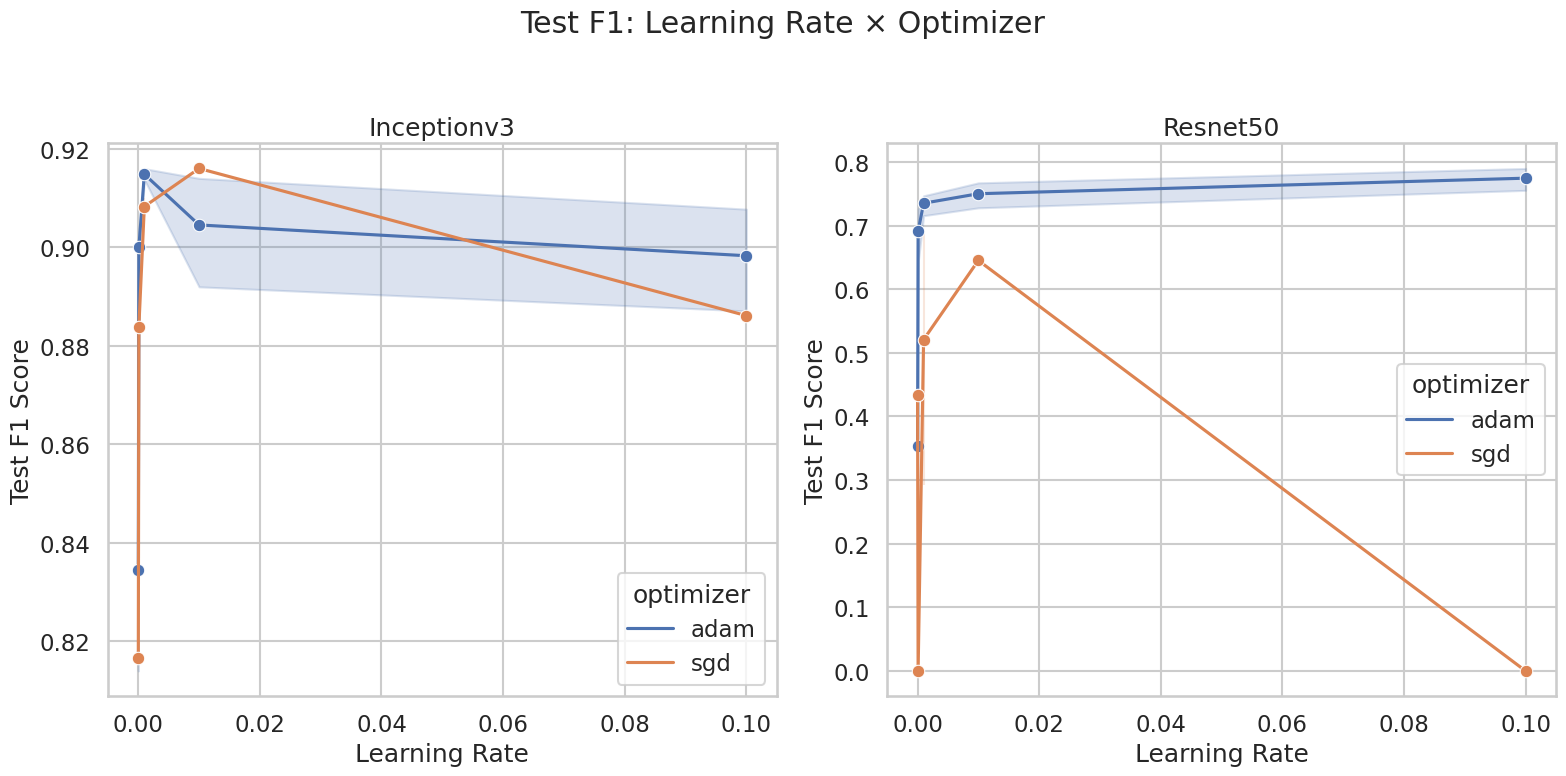

In [228]:
#5  Learning Rate × Optimizer (Lineplot)
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
for i, arch in enumerate(['inceptionv3', 'resnet50']):
    sns.lineplot(
        data=df[df['architecture'] == arch], 
        x='learning_rate', y='test_f1_score', hue='optimizer', marker='o', ax=axes[i])
    axes[i].set_title(f'{arch.title()}')
    axes[i].set_xlabel('Learning Rate')
    axes[i].set_ylabel('Test F1 Score')
fig.suptitle('Test F1: Learning Rate × Optimizer')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

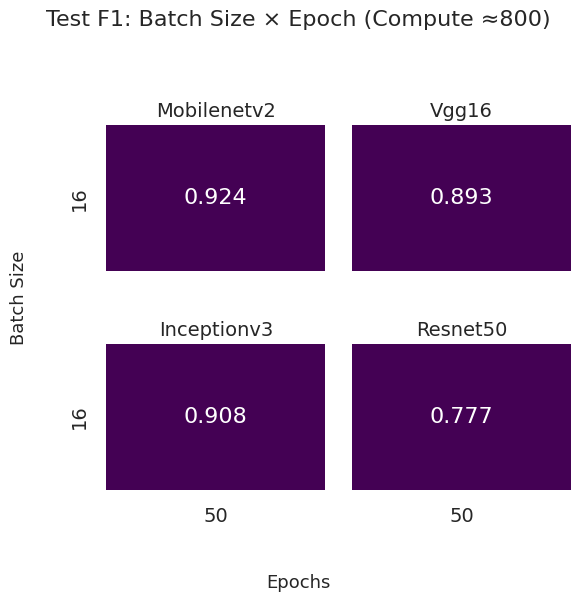

In [229]:
# 6. Batch Size × Epoch (Heatmap, only where BS × EP ≈ 1920)  

fig, axes = plt.subplots(2, 2, figsize=(6, 6), sharey=True, sharex=True)  # 2x2 grid for the 4 architectures
axes = axes.flatten()  # Flatten to 1D for easy indexing

for i, arch in enumerate(['mobilenetv2', 'vgg16', 'inceptionv3', 'resnet50']):
    df_tmp = df[df['architecture'] == arch]
    df_tmp = df_tmp[((df_tmp['batch_size'] * df_tmp['epochs']) >= 0.95 * 800) &
                    ((df_tmp['batch_size'] * df_tmp['epochs']) <= 1.05 * 800)]
    pivot = df_tmp.pivot_table(
        values='test_f1_score', index='batch_size', columns='epochs', aggfunc='mean')

    sns.heatmap(pivot, annot=True, fmt=".3f", cmap="viridis", ax=axes[i], cbar=False, annot_kws={"size": 16})
    axes[i].set_title(f'{arch.title()}', fontsize=14)

    axes[i].xaxis.label.set_visible(False)
    axes[i].yaxis.label.set_visible(False)
    axes[i].tick_params(axis='x', labelsize=14)
    axes[i].tick_params(axis='y', labelsize=14)


fig.supxlabel("Epochs", fontsize=13)
fig.supylabel("Batch Size", fontsize=13)



fig.suptitle('Test F1: Batch Size × Epoch (Compute ≈800)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(hspace=0.5)
plt.show()

In [230]:
# show best f1 score for each architecture
best_f1_scores = df.groupby('architecture')['test_f1_score'].max().reset_index()
best_f1_scores = best_f1_scores.sort_values(by='test_f1_score', ascending=False)
print("Best F1 Scores by Architecture for 2-factor analysis:")    
print(best_f1_scores)

Best F1 Scores by Architecture for 2-factor analysis:
  architecture  test_f1_score
1  mobilenetv2       0.924259
0  inceptionv3       0.922574
3        vgg16       0.900110
2     resnet50       0.812813


## 3 Factor Analysis

In [231]:
df1 = data[data['num_optimized_factors']==3].copy()
df1.shape

(626, 70)

In [232]:
df1.training_time.sum()/3600

246.99644941027776

In [233]:
# df1[df1.trial_number>=20]
df1 = df1.drop(df1[df1.trial_number>=20].index)   # Get only the first 20 experiments, all experiments were set to 30 but because of compute, some architectures halted at 20 +, not reaching 30

In [234]:
df1.to_csv('3factor_result.csv', index=False)

In [235]:
df = pd.read_csv('/kaggle/working/3factor_result.csv')
df.head(2)

,algorithm,trial_number,architecture,learning_rate,batch_size,dropout_rate,optimizer,epochs,optimized_parameter,optimization_type,num_optimized_factors,train_accuracy,train_precision,train_recall,train_f1_score,train_auc,train_cm_tn,train_cm_fp,train_cm_fn,train_cm_tp,val_accuracy,val_precision,val_recall,val_f1_score,val_auc,val_cm_tn,val_cm_fp,val_cm_fn,val_cm_tp,test_accuracy,test_precision,test_recall,test_f1_score,test_auc,test_cm_tn,test_cm_fp,test_cm_fn,test_cm_tp,min_train_loss,min_val_loss,max_train_f1,max_val_f1,max_train_accuracy,max_val_accuracy,training_time,final_epoch,history_loss_final,history_loss_best,history_loss_mean,history_loss_std,history_val_loss_final,history_val_loss_best,history_val_loss_mean,history_val_loss_std,history_f1_score_metric_final,history_f1_score_metric_best,history_f1_score_metric_mean,history_f1_score_metric_std,history_val_f1_score_metric_final,history_val_f1_score_metric_best,history_val_f1_score_metric_mean,history_val_f1_score_metric_std,history_accuracy_final,history_accuracy_best,history_accuracy_mean,history_accuracy_std,history_val_accuracy_final,history_val_accuracy_best,history_val_accuracy_mean,history_val_accuracy_std
0,Random_Search,0,inceptionv3,0.001,64,0.2,sgd,10,DROPOUT_RATE-EPOCHS-OPTIMIZER,multi_factor,3,0.910714,0.916465,0.903810,0.910094,0.970229,1927,173,202,1898,0.904444,0.915525,0.891111,0.903153,0.960054,413,37,49,401,0.905556,0.911964,0.897778,0.904815,0.961042,411,39,46,404,0.246272,0.250741,0.492951,0.508103,0.902857,0.904444,525.219061,10,0.246272,0.246272,0.289419,0.056180,0.250741,0.250741,0.277563,0.027003,0.490364,0.492951,0.490696,0.001122,0.492830,0.508103,0.494190,0.007345,0.899286,0.902857,0.879429,0.031187,0.904444,0.904444,0.887889,0.014406
1,Random_Search,1,inceptionv3,0.001,64,0.4,adam,40,DROPOUT_RATE-EPOCHS-OPTIMIZER,multi_factor,3,0.935000,0.948014,0.920476,0.934042,0.982735,1994,106,167,1933,0.913333,0.928571,0.895556,0.911765,0.968632,419,31,47,403,0.920000,0.927602,0.911111,0.919283,0.969062,418,32,40,410,0.198898,0.223266,0.497725,0.503052,0.921191,0.915556,1945.490235,40,0.206176,0.198898,0.232311,0.045637,0.224684,0.223266,0.237372,0.019020,0.494920,0.497725,0.493403,0.002117,0.490978,0.503052,0.488444,0.007415,0.917619,0.921191,0.904780,0.022664,0.913333,0.915556,0.908806,0.008204


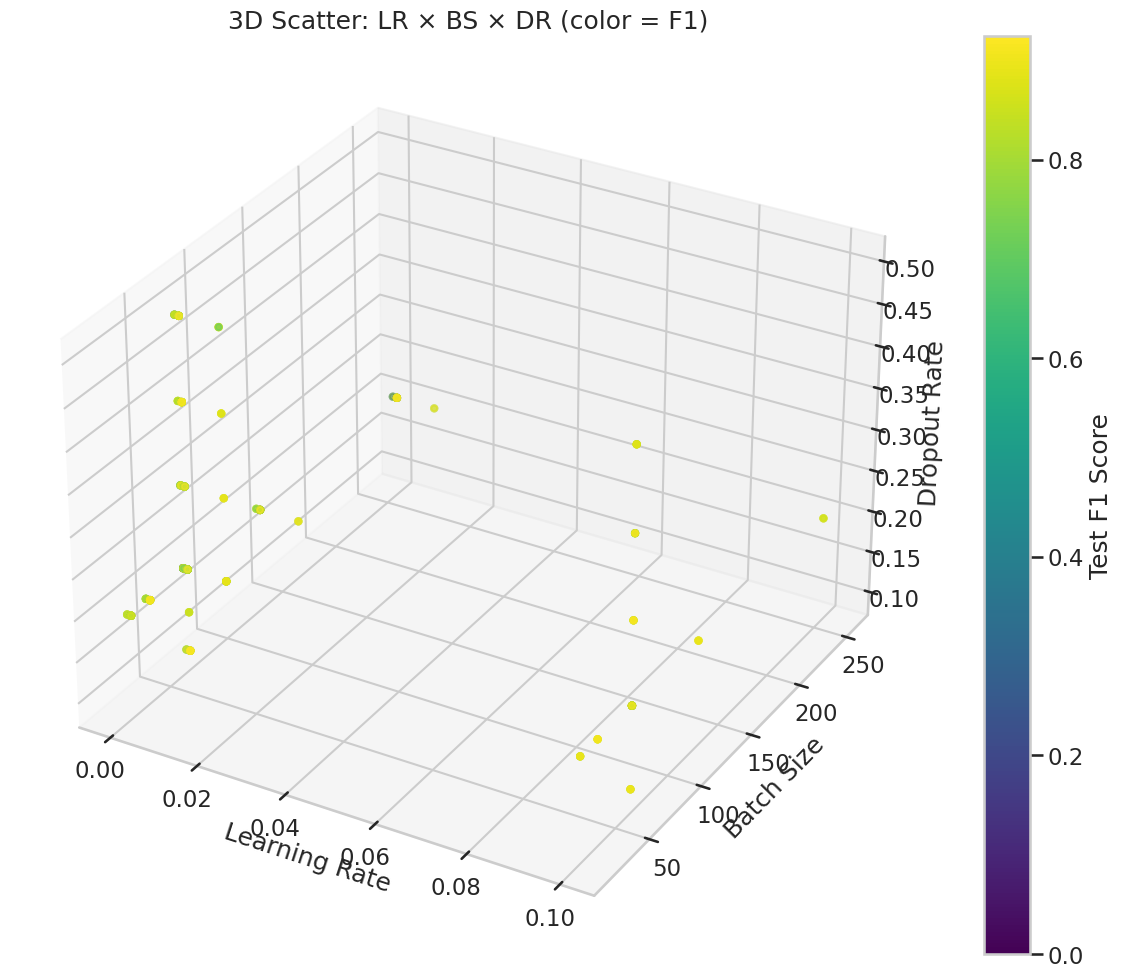

In [269]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Q1
df_plot = df.copy()  # Or filter for a specific architecture/optimizer if needed


fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Convert to numeric if needed
x = df_plot['learning_rate'].astype(float)
y = df_plot['batch_size'].astype(int)
z = df_plot['dropout_rate'].astype(float)
c = df_plot['test_f1_score'].astype(float)

sc = ax.scatter(x, y, z, c=c, cmap='viridis', s=20)
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Batch Size')
ax.set_zlabel('Dropout Rate')
plt.colorbar(sc, label='Test F1 Score')
plt.title('3D Scatter: LR × BS × DR (color = F1)')
plt.tight_layout()
plt.show()


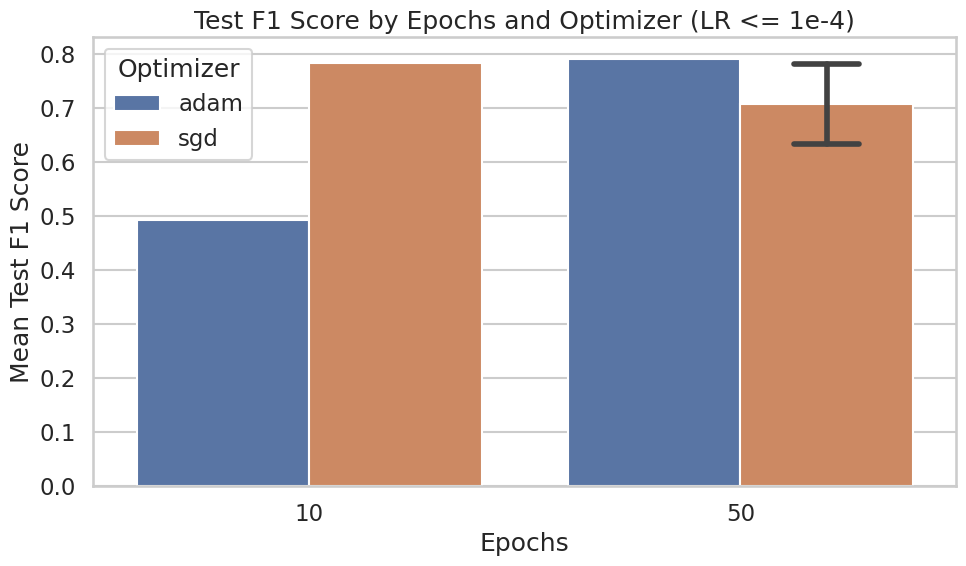

In [237]:
import seaborn as sns
import matplotlib.pyplot as plt

# Q2: Filter for specific learning rates, epochs, and optimizers

df_q2 = df[
    (df['learning_rate'].isin([1e-4, 1e-5])) &
    (df['epochs'].isin((10,50))) &
    (df['optimizer'].isin(['adam', 'sgd']))
]

# Aggregate mean and std per (learning_rate, epochs, optimizer)
agg = df_q2.groupby(['learning_rate', 'epochs', 'optimizer'])['test_f1_score'] \
    .agg(['mean', 'std']).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=agg,
    x='epochs',
    y='mean',
    hue='optimizer',
    errorbar='sd',  # or 'se'
    capsize=0.15,
    dodge=True
)
plt.xlabel('Epochs')
plt.ylabel('Mean Test F1 Score')
plt.title('Test F1 Score by Epochs and Optimizer (LR <= 1e-4)')
plt.legend(title='Optimizer')
plt.tight_layout()
plt.show()


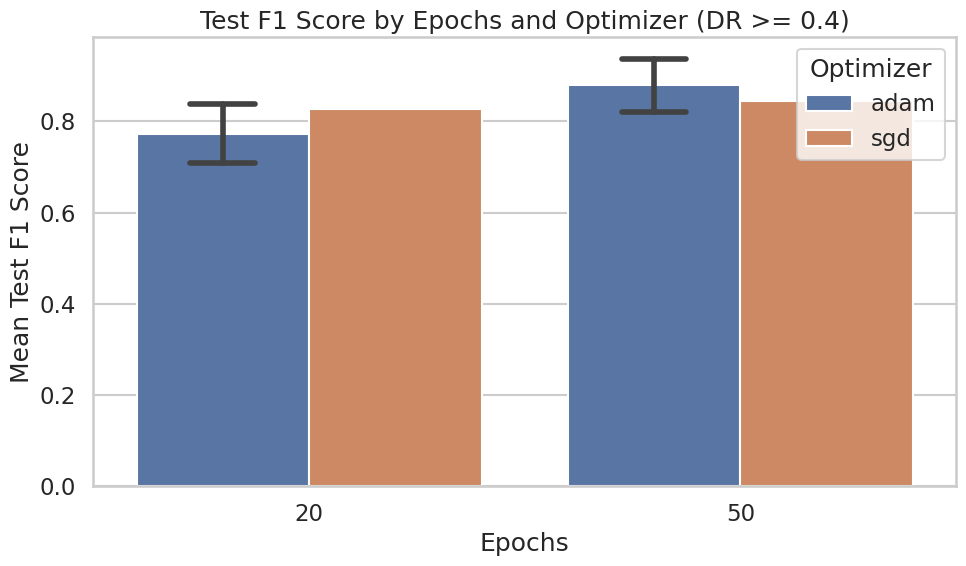

In [238]:
import seaborn as sns
import matplotlib.pyplot as plt

# Q3

df_q2 = df[
    (df['dropout_rate'].isin([0.4, 0.5])) &
    (df['epochs'].isin([20,50])) &
    (df['optimizer'].isin(['adam', 'sgd']))
]

# Aggregate mean and std per (dropout_rate, epochs, optimizer)
agg = df_q2.groupby(['dropout_rate', 'epochs', 'optimizer'])['test_f1_score'] \
    .agg(['mean', 'std']).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=agg,
    x='epochs',
    y='mean',
    hue='optimizer',
    errorbar='sd',  # or 'se'
    capsize=0.15,
    dodge=True
)
plt.xlabel('Epochs')
plt.ylabel('Mean Test F1 Score')
plt.title('Test F1 Score by Epochs and Optimizer (DR >= 0.4)')
plt.legend(title='Optimizer')
plt.tight_layout()
plt.show()


In [239]:
threshold = 0.92

# Filter for test_f1_score >= threshold
df_filtered = df[df['test_f1_score'] >= threshold]

hyperparameters = ['learning_rate', 'batch_size', 'dropout_rate', 'epochs', 'optimizer']

# Sort by test_f1_score descending before taking head
result = (
    df_filtered
    .sort_values('test_f1_score', ascending=False)  # highest score first
    .groupby(['algorithm', 'architecture'], as_index=False)
    .head(20)[['algorithm', 'architecture', 'test_f1_score']+hyperparameters]
    .sort_values('test_f1_score', ascending=False)  # keep overall highest at top
)

result.sort_values(by=['algorithm', 'architecture', 'test_f1_score'], ascending=[True, True, False], inplace=True)
result.reset_index(drop=True, inplace=True)
result


,algorithm,architecture,test_f1_score,learning_rate,batch_size,dropout_rate,epochs,optimizer
0,Bayesian_Optimization,inceptionv3,0.924972,0.001,64,0.1,50,adam
1,Bayesian_Optimization,inceptionv3,0.923423,0.001,64,0.4,40,adam
2,Bayesian_Optimization,inceptionv3,0.921892,0.001,64,0.1,50,adam
3,Bayesian_Optimization,inceptionv3,0.921525,0.010,64,0.2,40,adam
4,Bayesian_Optimization,inceptionv3,0.921348,0.010,64,0.2,40,adam
5,Bayesian_Optimization,inceptionv3,0.920670,0.001,64,0.4,50,adam
6,Bayesian_Optimization,inceptionv3,0.920493,0.001,64,0.1,50,adam
7,Bayesian_Optimization,inceptionv3,0.920177,0.010,64,0.2,30,adam
8,Bayesian_Optimization,mobilenetv2,0.922907,0.001,64,0.3,50,adam
9,Bayesian_Optimization,mobilenetv2,0.922907,0.001,64,0.2,30,adam


## 4-Factor Analysis

In [240]:
df1 = data[data['num_optimized_factors']==4].copy()
df1.shape

(416, 70)

In [241]:
df1.training_time.sum()/3600

174.05768895944445

In [242]:
# df1[df1.trial_number>=20]
df1 = df1.drop(df1[df1.trial_number>=20].index)

In [243]:
df1.to_csv('4factor_result.csv', index=False)

In [244]:
df = pd.read_csv('/kaggle/working/4factor_result.csv')
df.sample()

,algorithm,trial_number,architecture,learning_rate,batch_size,dropout_rate,optimizer,epochs,optimized_parameter,optimization_type,num_optimized_factors,train_accuracy,train_precision,train_recall,train_f1_score,train_auc,train_cm_tn,train_cm_fp,train_cm_fn,train_cm_tp,val_accuracy,val_precision,val_recall,val_f1_score,val_auc,val_cm_tn,val_cm_fp,val_cm_fn,val_cm_tp,test_accuracy,test_precision,test_recall,test_f1_score,test_auc,test_cm_tn,test_cm_fp,test_cm_fn,test_cm_tp,min_train_loss,min_val_loss,max_train_f1,max_val_f1,max_train_accuracy,max_val_accuracy,training_time,final_epoch,history_loss_final,history_loss_best,history_loss_mean,history_loss_std,history_val_loss_final,history_val_loss_best,history_val_loss_mean,history_val_loss_std,history_f1_score_metric_final,history_f1_score_metric_best,history_f1_score_metric_mean,history_f1_score_metric_std,history_val_f1_score_metric_final,history_val_f1_score_metric_best,history_val_f1_score_metric_mean,history_val_f1_score_metric_std,history_accuracy_final,history_accuracy_best,history_accuracy_mean,history_accuracy_std,history_val_accuracy_final,history_val_accuracy_best,history_val_accuracy_mean,history_val_accuracy_std
290,Bayesian_Optimization,10,resnet50,0.1,16,0.1,adam,20,LEARNING_RATE-BATCH_SIZE-DROPOUT_RATE-EPOCHS,multi_factor,4,0.827143,0.892123,0.744286,0.811526,0.906648,1911,189,537,1563,0.835556,0.912568,0.742222,0.818627,0.903659,418,32,116,334,0.788889,0.838542,0.715556,0.772182,0.892553,388,62,128,322,0.611565,0.433684,0.475242,0.619102,0.757381,0.84,1061.058394,20,0.86125,0.611565,0.808213,0.118744,0.503058,0.433684,0.687342,0.41025,0.460604,0.475242,0.456284,0.016687,0.441591,0.619102,0.440639,0.161831,0.724762,0.757381,0.708095,0.037987,0.835556,0.84,0.745444,0.095329


AUC ROC Summary per Algorithm:
                algorithm       max      mean       std  count
0  Bayesian_Optimization  0.922222  0.805373  0.182594    160
1          Random_Search  0.921680  0.758079  0.223246    160

Top 5 AUC ROC Configurations per Algorithm:
                  algorithm  test_f1_score  learning_rate  batch_size  \
57   Bayesian_Optimization       0.922222          0.001          16   
114  Bayesian_Optimization       0.920879          0.001         128   
119  Bayesian_Optimization       0.920879          0.001         128   
72   Bayesian_Optimization       0.920847          0.001         128   
115  Bayesian_Optimization       0.920044          0.001         128   
33           Random_Search       0.921680          0.010         256   
10           Random_Search       0.921373          0.010          64   
13           Random_Search       0.920091          0.100         256   
153          Random_Search       0.919390          0.010         256   
158          Ran

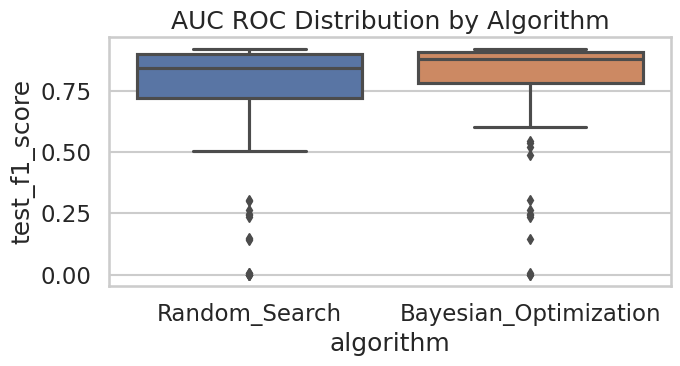

Accuracy Summary per Algorithm:
                algorithm       max      mean       std  count
0  Bayesian_Optimization  0.922222  0.805373  0.182594    160
1          Random_Search  0.921680  0.758079  0.223246    160

Top 5 Accuracy Configurations per Algorithm:
                  algorithm  test_f1_score  learning_rate  batch_size  epochs  \
57   Bayesian_Optimization       0.922222          0.001          16      20   
114  Bayesian_Optimization       0.920879          0.001         128      30   
119  Bayesian_Optimization       0.920879          0.001         128      40   
72   Bayesian_Optimization       0.920847          0.001         128      40   
115  Bayesian_Optimization       0.920044          0.001         128      40   
33           Random_Search       0.921680          0.010         256      40   
10           Random_Search       0.921373          0.010          64      30   
13           Random_Search       0.920091          0.100         256      50   
153          R

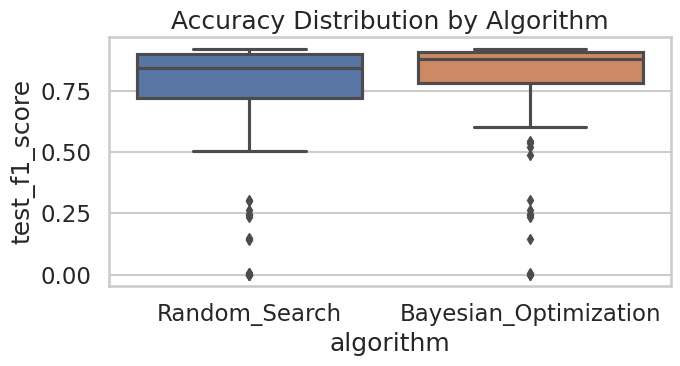

In [245]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('/kaggle/working/4factor_result.csv')

# ---- Q1: AUC ROC summary per algorithm ----
# Best and mean AUC ROC per algorithm
auc_summary = df.groupby('algorithm')['test_f1_score'].agg(['max', 'mean', 'std', 'count']).reset_index()
print("AUC ROC Summary per Algorithm:\n", auc_summary)

# Show top 5 configs per algorithm by AUC ROC
top_auc = df.sort_values(['algorithm', 'test_f1_score'], ascending=[True, False]).groupby('algorithm').head(5)
print("\nTop 5 AUC ROC Configurations per Algorithm:\n", top_auc[['algorithm','test_f1_score','learning_rate','batch_size','dropout_rate','epochs','optimizer']])

# Boxplot for visual distribution
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='algorithm', y='test_f1_score')
plt.title('AUC ROC Distribution by Algorithm')
plt.tight_layout()
plt.show()

# ---- Q2: Accuracy summary per algorithm ----
# Best and mean accuracy per algorithm
acc_summary = df.groupby('algorithm')['test_f1_score'].agg(['max', 'mean', 'std', 'count']).reset_index()
print("Accuracy Summary per Algorithm:\n", acc_summary)

# Show top 5 configs per algorithm by Accuracy
top_acc = df.sort_values(['algorithm', 'test_f1_score'], ascending=[True, False]).groupby('algorithm').head(5)
print("\nTop 5 Accuracy Configurations per Algorithm:\n", top_acc[['algorithm','test_f1_score','learning_rate','batch_size','epochs','optimizer']])

# Boxplot for visual distribution
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='algorithm', y='test_f1_score')
plt.title('Accuracy Distribution by Algorithm')
plt.tight_layout()
plt.show()


In [246]:
summary = df.groupby(['algorithm', 'architecture','learning_rate', 'batch_size', 'dropout_rate', 'epochs'])['test_f1_score'].agg(['mean', 'std', 'max', 'min']).reset_index()


# 1. Top 3 best configs (max F1)
top3 = summary.nlargest(3, 'max')

# 2. 3 worst configs (min F1)
worst3 = summary.nsmallest(3, 'min')

# 3. 3 highest std (most unstable)
unstable3 = summary.nlargest(3, 'std')

# 4. 3 rows around median mean (typical configs)
median_mean = summary['mean'].median()
summary['mean_distance'] = (summary['mean'] - median_mean).abs()
typical3 = summary.nsmallest(3, 'mean_distance')

# Concatenate, drop duplicates, and remove helper column
filtered = pd.concat([top3, worst3, unstable3, typical3]).drop_duplicates().drop(columns=['mean_distance'], errors='ignore')

# If more than 12 (e.g., overlap), sample or prioritize top3/worst3
filtered = filtered.head(12)
filtered


,algorithm,architecture,learning_rate,batch_size,dropout_rate,epochs,mean,std,max,min
13,Bayesian_Optimization,inceptionv3,0.00100,16,0.1,20,0.922222,NaN,0.922222,0.922222
152,Random_Search,inceptionv3,0.01000,256,0.3,40,0.921680,NaN,0.921680,0.921680
149,Random_Search,inceptionv3,0.01000,64,0.2,30,0.921373,NaN,0.921373,0.921373
86,Bayesian_Optimization,resnet50,0.01000,32,0.2,40,0.632162,0.353483,0.802444,0.000000
99,Bayesian_Optimization,vgg16,0.00001,256,0.2,20,0.000000,NaN,0.000000,0.000000
193,Random_Search,resnet50,0.00001,32,0.2,30,0.004425,0.006258,0.008850,0.000000
225,Random_Search,resnet50,0.10000,256,0.2,50,0.394934,0.558521,0.789869,0.000000
236,Random_Search,vgg16,0.00001,256,0.2,20,0.332456,0.470164,0.664912,0.000000
250,Random_Search,vgg16,0.00100,64,0.5,20,0.847826,NaN,0.847826,0.847826
109,Bayesian_Optimization,vgg16,0.00100,64,0.5,20,0.847397,0.003487,0.850649,0.843716


## 5 Factor Analysis

In [247]:
df1 = data[data['num_optimized_factors']==2].copy()
df1.shape

(478, 70)

In [248]:
df1.training_time.sum()/3600

167.2989096113889

In [249]:
# df1[df1.trial_number>=20]
df1 = df1.drop(df1[df1.trial_number>=20].index)

In [250]:
df1.to_csv('5factor_result.csv', index=False)

In [251]:
df = pd.read_csv('/kaggle/working/5factor_result.csv')

In [252]:
def top_n_configs(df, n=10):
    return (
        df.sort_values(by=['algorithm'], ascending=False)
          .groupby(['algorithm', 'architecture'])
          .head(n)
          .reset_index(drop=True)
    )

top_configs = top_n_configs(df, n=1)
top_configs = top_configs.sort_values(by=['algorithm', 'architecture', 'test_f1_score'], ascending=[True, True, False]) 
top_configs[['algorithm', 'architecture', 'learning_rate', 'batch_size', 'dropout_rate', 'epochs', 'optimizer', 'test_f1_score']]

,algorithm,architecture,learning_rate,batch_size,dropout_rate,epochs,optimizer,test_f1_score
3,Grid_Search,inceptionv3,0.001,64,0.2,20,adam,0.916100
0,Grid_Search,mobilenetv2,0.001,64,0.2,10,adam,0.910497
2,Grid_Search,resnet50,0.010,128,0.2,20,adam,0.738208
1,Grid_Search,vgg16,0.010,64,0.2,20,adam,0.890849


In [253]:
import pandas as pd
from scipy.stats import spearmanr
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Load data
df5 = pd.read_csv('/kaggle/working/5factor_result.csv')

# Prepare optimizer as numeric for stats
df5['optimizer_num'] = (df5['optimizer'] == 'adam').astype(int)

# 1. Top 5 by test_f1_score
top5_f1_5f = (
    df5.sort_values('test_f1_score', ascending=False)
      .head(5)
      [['algorithm','architecture','test_f1_score','learning_rate','batch_size','dropout_rate','epochs','optimizer']]
)
top5_f1_5f['test_f1_score'] = top5_f1_5f['test_f1_score'].round(4)

# 2. Spearman Correlation
feature_cols = ['learning_rate', 'batch_size', 'dropout_rate', 'epochs', 'optimizer_num']
spearman_results = []
for arch in df5['architecture'].unique():
    for alg in df5['algorithm'].unique():
        sub = df5[(df5['architecture']==arch) & (df5['algorithm']==alg)]
        if sub.shape[0] > 1:
            best_hp, best_rho, best_p = '', 0, 1
            for hp in feature_cols:
                rho, p = spearmanr(sub[hp], sub['test_f1_score'])
                if abs(rho) > abs(best_rho):
                    best_hp, best_rho, best_p = hp, rho, p
            spearman_results.append({
                'Architecture': arch,
                'Algorithm': alg,
                'Spearman ρ': round(best_rho, 4),
                'p-value': f"{best_p:.3g}",
                'Hyperparameter': best_hp.replace('_num', '').replace('_', ' ')
            })
spearman_df = pd.DataFrame(spearman_results)[['Architecture','Algorithm','Hyperparameter','Spearman ρ','p-value']]

# 3. Random Forest Feature Importance
rf_results = []
for arch in df5['architecture'].unique():
    for alg in df5['algorithm'].unique():
        sub = df5[(df5['architecture']==arch) & (df5['algorithm']==alg)]
        if sub.shape[0] > 5:
            X = sub[feature_cols]
            y = sub['test_f1_score']
            rf = RandomForestRegressor(n_estimators=50, random_state=0)
            rf.fit(X, y)
            importances = rf.feature_importances_
            best_idx = int(np.argmax(importances))
            rf_results.append({
                'Architecture': arch,
                'Algorithm': alg,
                'Hyperparameter': feature_cols[best_idx].replace('_num', '').replace('_', ' '),
                'Importance': round(importances[best_idx], 3)
            })
rf_df = pd.DataFrame(rf_results)


In [254]:
rf_df.head(3)

,Architecture,Algorithm,Hyperparameter,Importance
0,mobilenetv2,Grid_Search,learning rate,0.816
1,vgg16,Grid_Search,learning rate,0.782
2,inceptionv3,Grid_Search,learning rate,0.823


In [255]:
top5_f1_5f.head(1)

,algorithm,architecture,test_f1_score,learning_rate,batch_size,dropout_rate,epochs,optimizer
326,Grid_Search,mobilenetv2,0.9243,0.001,16,0.2,50,adam


In [256]:
spearman_df.head(1)

,Architecture,Algorithm,Hyperparameter,Spearman ρ,p-value
0,mobilenetv2,Grid_Search,epochs,0.4613,1.36e-06


In [257]:
best_df = data[data['test_f1_score'] == data['test_f1_score'].max()]
best_df

,algorithm,trial_number,architecture,learning_rate,batch_size,dropout_rate,optimizer,epochs,optimized_parameter,optimization_type,num_optimized_factors,train_accuracy,train_precision,train_recall,train_f1_score,train_auc,train_cm_tn,train_cm_fp,train_cm_fn,train_cm_tp,val_accuracy,val_precision,val_recall,val_f1_score,val_auc,val_cm_tn,val_cm_fp,val_cm_fn,val_cm_tp,test_accuracy,test_precision,test_recall,test_f1_score,test_auc,test_cm_tn,test_cm_fp,test_cm_fn,test_cm_tp,min_train_loss,min_val_loss,max_train_f1,max_val_f1,max_train_accuracy,max_val_accuracy,training_time,final_epoch,history_loss_final,history_loss_best,history_loss_mean,history_loss_std,history_val_loss_final,history_val_loss_best,history_val_loss_mean,history_val_loss_std,history_f1_score_metric_final,history_f1_score_metric_best,history_f1_score_metric_mean,history_f1_score_metric_std,history_val_f1_score_metric_final,history_val_f1_score_metric_best,history_val_f1_score_metric_mean,history_val_f1_score_metric_std,history_accuracy_final,history_accuracy_best,history_accuracy_mean,history_accuracy_std,history_val_accuracy_final,history_val_accuracy_best,history_val_accuracy_mean,history_val_accuracy_std
146,Bayesian_Optimization,16,inceptionv3,0.001,64,0.1,adam,50,DROPOUT_RATE-EPOCHS-OPTIMIZER,multi_factor,3,0.949524,0.957808,0.940476,0.949063,0.988417,2013,87,125,1975,0.915556,0.930876,0.897778,0.914027,0.968543,420,30,46,404,0.925556,0.93228,0.917778,0.924972,0.968444,420,30,37,413,0.156138,0.223715,0.496488,0.509383,0.94119,0.921111,2569.22606,50,0.156138,0.156138,0.187869,0.039772,0.227298,0.223715,0.234386,0.013867,0.495222,0.496488,0.493363,0.002308,0.490855,0.509383,0.490708,0.008489,0.940714,0.94119,0.925214,0.018748,0.915556,0.921111,0.911533,0.007916


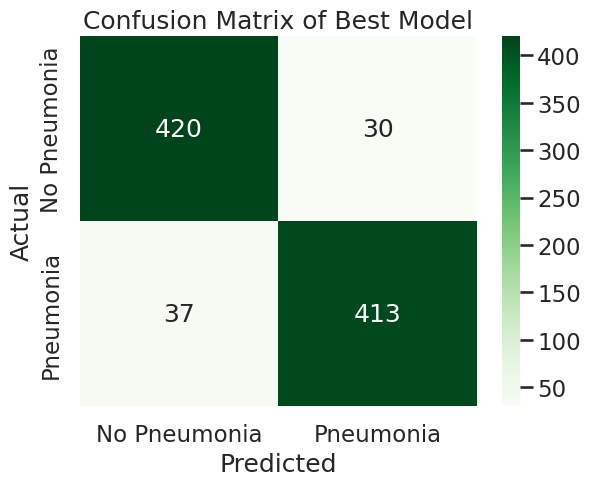

In [258]:
# plot confusion matrix of the best model using best_df.test_cm_tp, best_df.test_cm_fp, best_df.test_cm_fn, best_df.test_cm_tn
import matplotlib.pyplot as plt
import seaborn as sns
cm = np.array([[best_df.test_cm_tn.values[0], best_df.test_cm_fp.values[0]],
                [best_df.test_cm_fn.values[0], best_df.test_cm_tp.values[0]]])
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['No Pneumonia', 'Pneumonia'], yticklabels=['No Pneumonia', 'Pneumonia'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Best Model')
plt.show()
